In [68]:
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [24]:
kmeans.fit(X)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [25]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [26]:
label=kmeans.labels_

In [27]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [28]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [29]:
kmeans.inertia_

16.0

In [30]:
wcss=[]
for i in [2,3]:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
import matplotlib.pyplot as plt

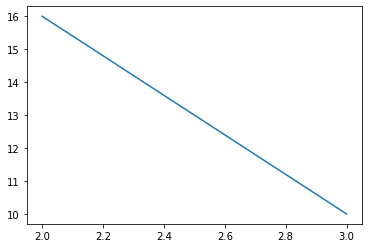

In [32]:
plt.plot([2,3],wcss)

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(X,label)

0.7133477791749615

In [35]:
import pandas as pd
pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### TASK
1. import datset
2. k=3,4,5,6,7
3. wcss/insertia_
4. plot it and find optimal k value
5. sihloutee score and dunn index

In [65]:
import pandas as pd
pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [66]:
X=df.iloc[:,3:]

In [146]:
wcss=[]
for i in range(3,8):
    kmean=KMeans(n_clusters=i, init="k-means++",random_state=100)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

In [147]:
wcss

[106458.55085415227,
 73751.1921973831,
 44448.45544793371,
 37265.86520484347,
 30262.335778714038]

Text(0, 0.5, 'WCSS or Inetria')

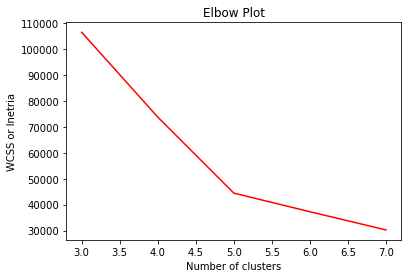

In [148]:
plt.figure()
plt.plot(range(3,8), wcss, color="r")
plt.title("Elbow Plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS or Inetria")

In [134]:
k_mean=KMeans(n_clusters=5, init="k-means++",random_state=100)

In [135]:
k_mean.fit(X)

KMeans(n_clusters=5, random_state=100)

In [136]:
X["Cluster_no"]=k_mean.predict(X)

In [137]:
X["Cluster_no"]

0      1
1      4
2      1
3      4
4      1
      ..
195    0
196    3
197    0
198    3
199    0
Name: Cluster_no, Length: 200, dtype: int32

In [138]:
silhouette_score(X,k_mean.labels_)

0.554394869487691

In [36]:
# HC Clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [38]:
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

In [39]:
clustering = AgglomerativeClustering()

In [40]:
clustering.fit(X)

AgglomerativeClustering()

In [41]:
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [43]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [44]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
data=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [47]:
X=np.array(data)

In [59]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [53]:
# model = AgglomerativeClustering(n_clusters=3)

In [60]:
model=model.fit(X)

In [61]:
model.labels_

array([146, 167, 156, 174, 159, 132, 102, 171, 108, 163, 172, 109, 160,
       157, 112, 118, 127, 110, 147, 145, 117, 195, 137, 178, 149, 197,
       173, 175, 152, 169, 126, 161, 128, 100, 123, 153, 111, 116, 131,
       124,  85, 196, 193,  55, 139, 141, 113, 106, 198, 138,  72, 194,
       189, 104, 170, 115, 107, 185,  84, 129,  96, 151, 142, 176, 191,
       199, 101, 192, 168, 114,  83, 177,  54, 158, 190, 187, 162,  80,
       188,  94,  95,  53, 136, 130,  56,  27, 144, 155, 103, 143, 179,
        41, 186, 181, 183, 119,  99,  26, 184,  87, 182,  92,  61,  90,
        86,  57, 154,  91, 166,  71,  77, 148,  50,  49,  76,  24,  78,
        64, 125, 180, 120, 122,  63, 105,  75,  65, 165,  38,  37,  97,
        79, 134,  93, 135,  18, 121,  89, 164,  58,  28, 133,  51,  46,
        73,  47,  60,  70,  81, 150,  39,  44,  88,  82,  74, 140,  66,
        98,  59,  35,  52,  31,  32,  45,  42,  69,  36,  17,  29,  62,
        43,  21,  15,  25,  22,  40,  30,  67,  12,  48,  20,   

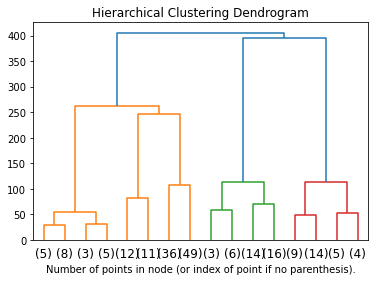

In [62]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# For data set dendo gram

In [63]:
data = df.iloc[:, 3:5].values

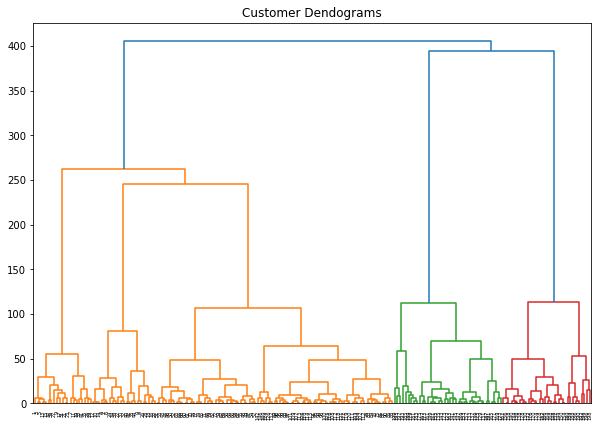

In [64]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))